# Identifying handwritten digits using Dimensionality Reduction

Packages used
- Tensorflow
- Keras
- Seaborn
- Pandas
- Sckit learn

Importing the libraries 

In [1]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.datasets import mnist
import pandas as pd
import numpy as np
import seaborn as sns
from time import time
from sklearn import model_selection
%matplotlib inline

Using TensorFlow backend.


Loading the dataset 

In [2]:
(X, Y), (Xtest, Ytest) = mnist.load_data()
img_width, img_height = X[0].shape

Training values and test values are converted to tensors by dividing by 255

In [3]:
X = X/255
Xtest = Xtest/255

Check the dimensions 

In [4]:
print(X.shape)
print(Xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


The input data is plotted.

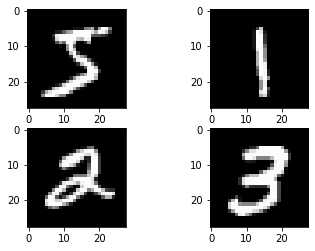

In [5]:
plt.subplot(221)
plt.imshow(X[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X[8], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X[5], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X[7], cmap=plt.get_cmap('gray'))
plt.show()

The tensor is reshaped into a matrix and scaled about to increase efficiency and classification accuracy

In [6]:
X = X.reshape(X.shape[0], img_width*img_height)
X -= X.mean(axis=0)

In [9]:
def scatter_plot(X,Y,c1,c2,N):
  label1 = f'Component {c1}'
  label2 = f'Component {c2}'
  df = pd.DataFrame({label1:X[:N, c1], label2:X[:N,c2], 'label':Y[:N]})
  sns.lmplot(data = df, x = label1, y=label2, fit_reg=False,
             hue='label', scatter_kws={'alpha':0.5})

The input is transformed to fit into the PCA model and passed through 5 classifiers and accuracy results are stored in the list. 

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)

In [31]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTREE', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
results = []
names = []
for name, model in models:
 kfold = KFold(n_splits=10, random_state=7, shuffle=True)
 cv_results = cross_val_score(model, X_reduced, Y, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.801833 (0.003752)
LDA: 0.767567 (0.002818)
KNN: 0.931567 (0.002571)
DTREE: 0.825883 (0.004912)
NB: 0.770117 (0.004737)


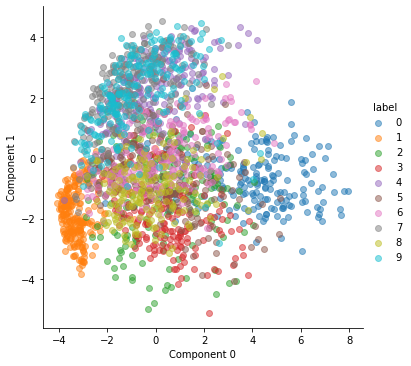

In [30]:
scatter_plot(X_reduced, Y, 0, 1, 2000)

Now the input data is transformed to fit into the ICA model and then plotted to observe that the components in the data are still overlapping and have not been reduced efficiently .


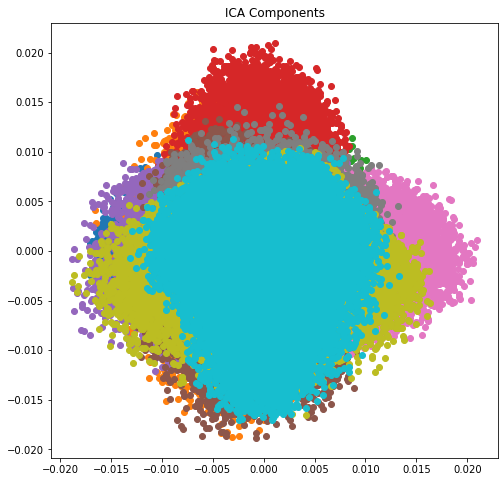

In [32]:
from sklearn.decomposition import FastICA
ICA = FastICA(n_components=10, random_state=12)
X_ICA_reduced = ICA.fit_transform(X)
plt.figure(figsize=(8,8))
plt.title('ICA Components')
plt.scatter(X_ICA_reduced[:,0], X_ICA_reduced[:,9])
plt.scatter(X_ICA_reduced[:,1], X_ICA_reduced[:,8])
plt.scatter(X_ICA_reduced[:,2], X_ICA_reduced[:,7])
plt.scatter(X_ICA_reduced[:,3], X_ICA_reduced[:,6])
plt.scatter(X_ICA_reduced[:,4], X_ICA_reduced[:,5])
plt.scatter(X_ICA_reduced[:,5], X_ICA_reduced[:,4])
plt.scatter(X_ICA_reduced[:,6], X_ICA_reduced[:,3])
plt.scatter(X_ICA_reduced[:,7], X_ICA_reduced[:,2])
plt.scatter(X_ICA_reduced[:,8], X_ICA_reduced[:,1])
plt.scatter(X_ICA_reduced[:,9], X_ICA_reduced[:,0])
